In [1]:
import torch
import random
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

We only focus on maximizing inter-embedding space

In [2]:

def plot_embeddings(embs):
    embs_temp = embs.clone().detach().tolist()

    fig = plt.figure(figsize=(7,7))
    ax = fig.add_subplot(projection='3d')
    ax.set_xlim3d(-1, 1)
    ax.set_ylim3d(-1, 1)
    ax.set_zlim3d(-1, 1)
    ax.view_init(25, 10)

    # plot embeddings
    for emb in embs_temp:
        ax.quiver(0, 0, 0, emb[0], emb[1], emb[2], color='blue')

In [3]:
"""
Function that shuffles indexes (duplicates allowed) where at least we know
the new index is NOT the original index!
"""
def shuffled_indices(max_index):
    out = []
    for idx in range(max_index):
        out.append(random.choice([x for x in range(max_index) if not x == idx]))
    return out

shuffled_indices(20)


[2, 6, 5, 18, 16, 13, 14, 6, 10, 6, 15, 18, 10, 2, 12, 7, 11, 9, 10, 3]

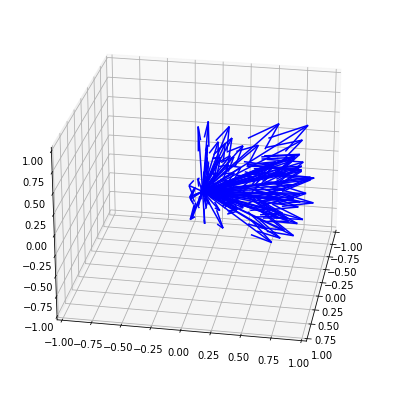

In [94]:
embs = torch.rand((100,3), requires_grad=True)

# show initial random embeddings
plot_embeddings(embs)

0.7026700377464294
0.6454505920410156
0.5545935034751892
0.47729817032814026
0.3901417553424835
0.2930636703968048
0.2877846956253052
0.24878378212451935
0.12866508960723877
0.003385113552212715
0.04264070466160774
0.009976492263376713
0.02291029877960682
-0.01342703029513359
-0.0887058675289154
0.0512792244553566
-0.035712920129299164
0.02622988633811474
0.10848751664161682
-0.08458399027585983
-0.06066223606467247
-0.1396767497062683
0.09043699502944946
0.0042072804644703865
0.008180499076843262
0.04602804780006409
-0.08966579288244247
5.875587521586567e-05
-0.020054083317518234
-0.10121264308691025
-0.001669152989052236
-0.10429267585277557
-0.003485854947939515
-0.02464870922267437
-0.12523414194583893
0.014733083546161652
-0.00927015207707882
0.013240039348602295
-0.04196407273411751
-0.05855516344308853
0.06681171804666519
0.03546911105513573
0.04244150221347809
-0.11172745376825333
-0.03780406340956688
0.02208481729030609
-0.013211499899625778
0.22129623591899872
-0.020740874111

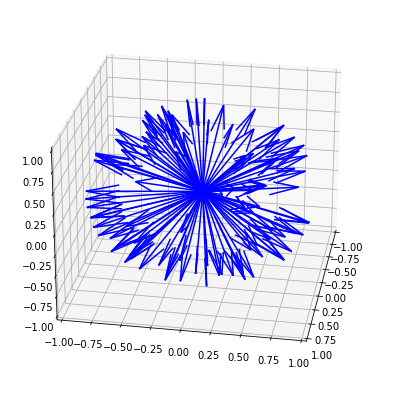

In [98]:
lr=0.1
cos = torch.nn.CosineSimilarity(dim=-1)

# training loop
for step in range(5000):

    # sample negative embeddings that is NOT equal to original index :-)
    neg_idx = shuffled_indices(embs.size(0))
    negs = torch.index_select(embs, 0, torch.tensor(neg_idx))

    loss = torch.mean(cos(embs, negs))
    if (step+1)%100==0:
        print(loss.item())
    loss.backward()

    # update
    with torch.no_grad():
        embs = embs - embs.grad*lr

    # normalize embeddings each step
    embs = F.normalize(embs)
    embs.requires_grad = True

# plot all embs
plot_embeddings(embs)

I consider this a succesfull test. Embeddings diversify over the embedding space.